In [1]:
# import the needed packages and check version
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("tensorflow: ", tf.__version__) #1.14.0

tensorflow:  1.14.0


In [2]:
#import the fashion mnist dataset (from Zalando)
fashion_mnist = keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#preprocess the data
train_x = np.expand_dims(train_images/255.0, axis=3)
train_y = train_labels
test_y = test_labels
test_x = np.expand_dims(test_images/255.0, axis=3)

## prepare data and exclude one class

exclude one class and get this class seperately from the test set to test later

In [5]:
nine_x = test_x[np.where(test_y==9)[0]]
nine_y = test_y[np.where(test_y==9)[0]]

zero_x = test_x[np.where(test_y==0)[0]]
zero_y = test_y[np.where(test_y==0)[0]]

In [6]:
train_x = np.delete(train_x, np.where((train_y==9))[0], axis = 0)
train_y = np.delete(train_y, np.where(train_y==9)[0], axis = 0)

In [7]:
train_y = np.array(pd.get_dummies(train_y))

In [8]:
test_x_reduced = np.delete(test_x, np.where((test_y==9))[0], axis=0)
test_y_reduced = np.delete(test_y, np.where((test_y==9))[0], axis=0)

In [9]:
test_y_reduced = np.array(pd.get_dummies(test_y_reduced))

In [10]:
#adjust labels
class_names_adj = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag']

## construct a baseline CNN

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                

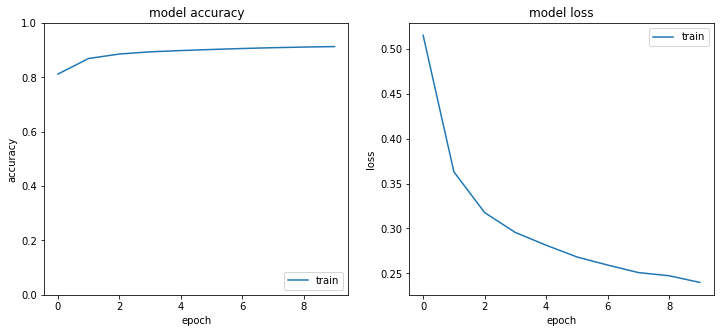

In [70]:
# Construct a baseline CNN

model_b = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.5)),
    keras.layers.Dense(9, activation='softmax')
])

model_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_b.summary()

history_b = model_b.fit(train_x, train_y, epochs = 10)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_b.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_b.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [71]:
model_b.evaluate(test_x_reduced, test_y_reduced) #test the network with adjusted test set

9000/9000 [==============================] - 2s 220us/sample - loss: 0.2404 - acc: 0.9170


[0.24041073830922444, 0.917]

In [72]:
model_b.save('A_008_model_b.h5') #save the model

In [11]:
model_b = tf.keras.models.load_model('A_model_b.h5')

W1115 09:36:24.680001  9136 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1115 09:36:24.680001  9136 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1115 09:36:24.680001  9136 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_op

## create a BNN

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)       

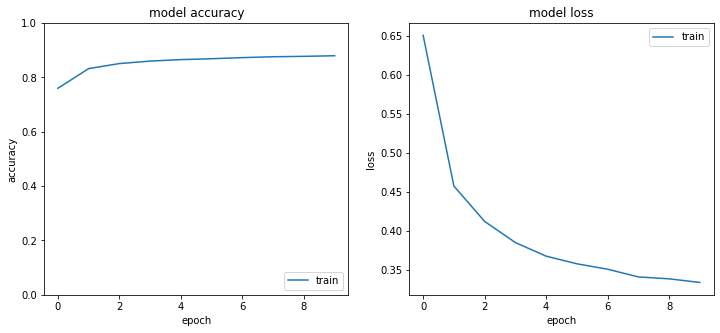

In [74]:
input_layer = keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1))
dropout_1 = keras.layers.Dropout((0.3))
conv_2 = keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu')
dropout_3 = keras.layers.Dropout((0.3))
max_pool_4 = keras.layers.MaxPooling2D(2,2)
dropout_5 = keras.layers.Dropout((0.3))

model_mc2 = keras.Sequential([
    input_layer,
    dropout_1,
    conv_2,
    dropout_3,
    max_pool_4,
    dropout_5,
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Dropout((0.3)),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.3)),
    keras.layers.Dense(9, activation='softmax')
])

model_mc2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mc2.summary()

import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

history_mc2 = model_mc2.fit(train_x, train_y, epochs = 10)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_mc2.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_mc2.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [75]:
model_mc2.evaluate(test_x_reduced, test_y_reduced) #test the network with adjusted test set

9000/9000 [==============================] - 2s 245us/sample - loss: 0.3184 - acc: 0.8899


[0.3183999333116743, 0.8898889]

In [76]:
model_mc2.save('A_008_model_mc.h5') #save the model

In [12]:
model_mc2 = tf.keras.models.load_model('A_008_model_mc.h5')

In [23]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

## test with a picture from a class the network has seen before

In [78]:
# set picture
picture = 100
picture_end = picture+1

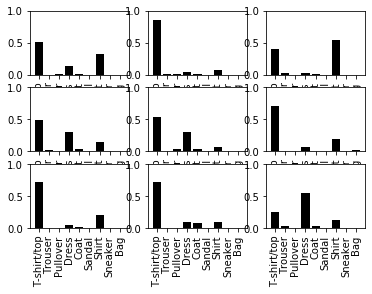

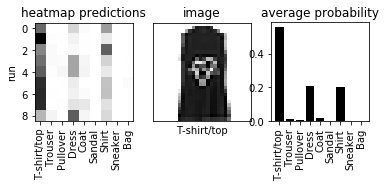

[5.5645144e-01 1.3321953e-02 4.1413442e-03 2.0714293e-01 1.8304970e-02
 7.6182607e-07 1.9907328e-01 2.5465229e-06 1.5608403e-03]


In [79]:
x = [0,1,2,3,4,5,6,7,8]
predictions = model_mc2_pred([zero_x[picture:picture_end], 1])[0]
for i in range(100):
    pred = model_mc2_pred([zero_x[picture:picture_end], 1])[0]
    predictions = np.append(predictions, pred, axis = 0)
    
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(9), class_names_adj, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()
    #print(i, predictions)
#x = [1,2,3,4,5,6,7,8,9]
#y = pred[0].tolist()
#plt.bar(x, y)
#print(predictions)
plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:9], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(zero_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names_adj[zero_y[picture_end]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

# Compare the two networks with each other

In [13]:
#first on the reduced test set, where the class 9 has been deleted
model_b.evaluate(test_x_reduced, test_y_reduced)

9000/9000 [==============================] - 2s 192us/sample - loss: 2.3807 - acc: 0.2186


[2.380683449215359, 0.21855555]

In [14]:
model_mc2.evaluate(test_x_reduced, test_y_reduced)

9000/9000 [==============================] - 3s 286us/sample - loss: 0.3184 - acc: 0.8899


[0.3183999333116743, 0.8898889]

# Check whether BNN can detect unseen class

In [18]:
def uncertainty_predict(picture, prediction_function, number_of_classes, number_of_predictions):
    n = number_of_predictions
    m = number_of_classes
    
    # create an empty list to store the predictions in, the maximal probability is the predicted class
    l = []
    for i in range(n):
        predictions = prediction_function([picture, 1])[0]
        l.append(predictions.argmax())
    
    #create a list to store the purity values in
    p = []
    for j in range(m):
        purity = l.count(j)/n
        p.append(purity)
    
    return l, p

In [19]:
def predict(dataset, prediction_function, number_of_classes, number_of_predictions, max_deviation=0.0, additional_class=None):
    #create a list to store the results in
    if additional_class == None:
        e = number_of_classes + 1 #to mark a datapoint which network is not certain about
    else: 
        e = additional_class
        
    r = []
    cl = [] # create a  list just with the classes
    n = dataset.shape[0] #number of datapoints in the dataset

    for i in range(n):
        probabilities = uncertainty_predict(dataset[i:i+1], prediction_function, number_of_classes, number_of_predictions)[1]
        p = max(probabilities)
        v = round(p*(1-p), 2)
        s = round(v**(1/2), 2)
        # get the class
        c = probabilities.index(max(probabilities))
        # get the class if uncertainty is set
        
        if max_deviation == 0:
            d = c
        else:
            if s > max_deviation:
                d = e
            else:
                d = c
        #d = c
        
        r.append([c, d, p, v, s])
        
        cl.append(d)
        
    return r, cl

In [32]:
pred, classes = predict(nine_x, model_mc2_pred, 9, 100, 0.2, 9)

In [33]:
classes.count(9)/nine_x.shape[0]

0.266

In [39]:
pd.DataFrame(pred).where(pd.DataFrame(pred)[4]>=0.10).count()

0    738
1    738
2    738
3    738
4    738
dtype: int64

# how does the bnn with special prediction perform on the test dataset

In [60]:
pred, classes = predict(test_x, model_mc2_pred, 9, 150, 0.4, 9)

In [74]:
import pandas as pd

In [75]:
pd = pd.DataFrame(pred)
pd['soll'] = test_y

In [64]:
(pd[0] == test_y).sum() #8028/10000 = 0.82 accuracy with the predicitons based on multiple predictions with n = 100 and dev > 0.2

8034

In [65]:
(pd[1] == test_y).sum() #6754/10000 = 0.78 accuracy when the "shaky ones" are given the label of the not seen class (aka 9) with n = 100 and dev > 0.2

6963

In [66]:
(pd[4] >= 0.2).sum() #--> 0.34% of the predictions have a deviation of more than 20% with n = 100 and dev > 0.2

3337

In [87]:
pd_check = pd[pd[1] != test_y]

In [94]:
pd[pd['soll'] == 9].describe()

,0,1,2,3,4,soll
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,6.35200,7.760000,0.873093,0.089050,0.238790,9.0
std,0.94286,1.302343,0.148863,0.089203,0.178432,0.0
min,5.00000,5.000000,0.360000,0.000000,0.000000,9.0
25%,5.00000,7.000000,0.780000,0.010000,0.100000,9.0
50%,7.00000,7.000000,0.940000,0.060000,0.240000,9.0
75%,7.00000,9.000000,0.993333,0.170000,0.410000,9.0
max,8.00000,9.000000,1.000000,0.250000,0.500000,9.0


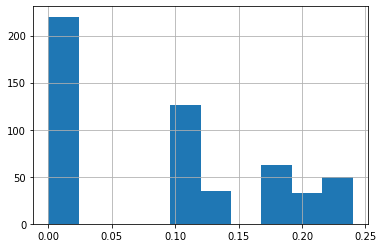

In [97]:
pd_check[pd_check['soll'] == 9][4].hist()

In [95]:
pd[pd['soll'] != 9].describe()

,0,1,2,3,4,soll
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,3.982667,5.397889,0.924273,0.051173,0.137557,4.000000
std,2.566448,3.138542,0.138078,0.082011,0.179358,2.582132
min,0.000000,0.000000,0.293333,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.920000,0.000000,0.000000,2.000000
50%,4.000000,6.000000,1.000000,0.000000,0.000000,4.000000
75%,6.000000,9.000000,1.000000,0.070000,0.260000,6.000000
max,8.000000,9.000000,1.000000,0.250000,0.500000,8.000000


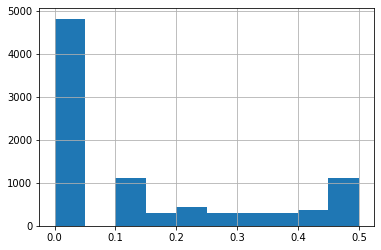

In [98]:
pd[pd['soll'] != 9][4].hist()